In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv(r'C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\Telecom churn\new 1\df_cleaned.csv')
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,60,No,3-Good,Town,Crafts,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
df.reset_index(inplace=True, drop=True)

### Split the dependent and independent variables

In [4]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

In [5]:
df_target.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [7]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0 

In [8]:
df_target = df_target.astype(int)

In [9]:
df_target.value_counts()

0    38762
1    12285
Name: Churn, dtype: int64

## Distribution of dependent variable.

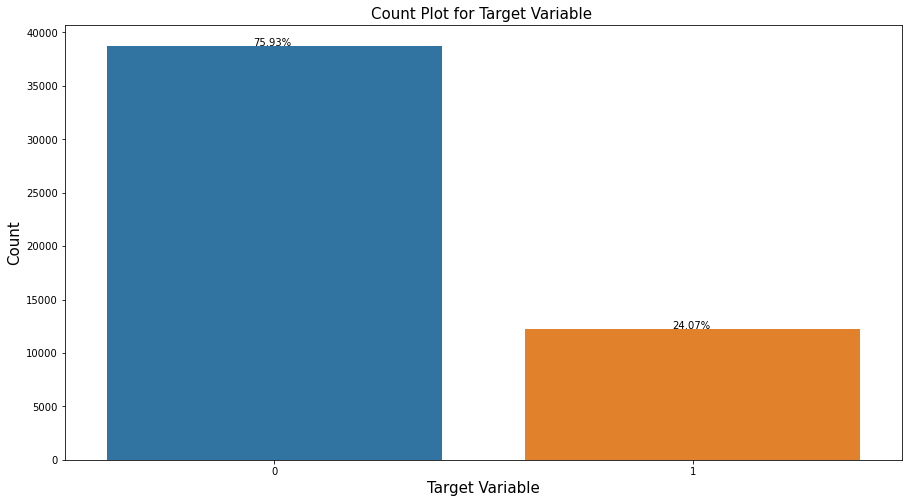

In [10]:
# get counts of 0's and 1's in the 'Loan Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable ', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

## Filter numerical and categorical variables.

In [11]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
num_f = df_features.select_dtypes(include=[np.number])

# display numerical features
num_f.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'HandsetPrice'],
      dtype='object')

In [12]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
cat_f = df_features.select_dtypes(exclude=[np.number])

# display categorical features
cat_f.columns

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [13]:
## Encoding the Categorical Variables

In [13]:
cat=df_features.select_dtypes(include='object').columns
cat

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_f[cat]=enc.fit_transform(cat_f[cat])

In [15]:
cat_f.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000


In [16]:
cat_f.shape

(51047, 20)

## POWER TRANSFORMATION

As our data has both positive and negative values, we have used `yeo-johnson` power Transformation as it works for both.

In [17]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in num_f.columns:
    num_f[i]=PT.fit_transform(num_f[[i]])

In [18]:
num_f.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-1.081555,-0.420406,-1.114949,-0.041736,-0.996427,-0.620104,-0.568643,-0.452839,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806246,1.119186,0.104253,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.191064
1,-1.543960,-1.930318,-1.432431,-0.912711,-0.996427,-0.620104,0.019325,0.088119,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806246,-0.767295,3.032270,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.191064
2,-0.417830,-1.990611,-0.274291,-0.912711,-0.996427,-0.620104,0.027093,0.088119,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850952,-0.767295,3.588779,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-0.051356
3,0.826127,1.395488,1.183858,1.174017,-0.996427,-0.620104,0.657306,0.284697,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895742,1.700430,0.461891,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.659163
4,-1.532581,-2.458386,-1.432431,-0.912711,-0.996427,-0.620104,0.034881,0.082920,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593762,1.552457,1.617268,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.659163


In [19]:
num_f.shape

(51047, 35)

In [21]:
#### Concatenate scaled numerical and ordinal encoded categorical variables

In [20]:
df_features = pd.concat([cat_f,num_f], axis =1)
df_features.shape

(51047, 55)

In [21]:
df_features.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,-1.081555,-0.420406,-1.114949,-0.041736,-0.996427,-0.620104,-0.568643,-0.452839,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806246,1.119186,0.104253,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.191064
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,-1.543960,-1.930318,-1.432431,-0.912711,-0.996427,-0.620104,0.019325,0.088119,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806246,-0.767295,3.032270,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.191064
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000,-0.417830,-1.990611,-0.274291,-0.912711,-0.996427,-0.620104,0.027093,0.088119,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850952,-0.767295,3.588779,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-0.051356
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.826127,1.395488,1.183858,1.174017,-0.996427,-0.620104,0.657306,0.284697,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895742,1.700430,0.461891,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.659163
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,-1.532581,-2.458386,-1.432431,-0.912711,-0.996427,-0.620104,0.034881,0.082920,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593762,1.552457,1.617268,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.659163


In [22]:
df_target.nunique()

2

## Train-Test Split

Before applying various classification techniques to predict the Churn, let us split the dataset in train and test set.

In [23]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35732, 55)
y_train:  (35732,)
x_test:  (15315, 55)
y_test:  (15315,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [24]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

#### Create a generalized function to calculate the metrics for the train and the test set.

In [26]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [27]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(x_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

# Random Forest for Classification

In [28]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 5, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, y_train)

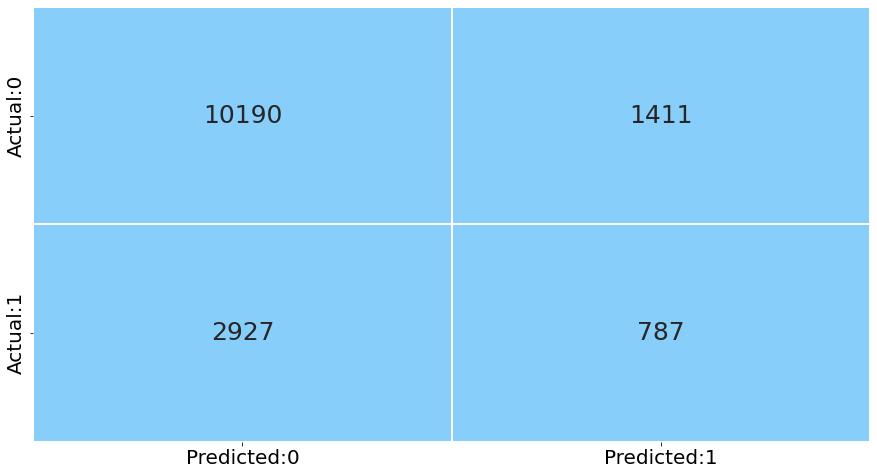

In [29]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Calculate performance measures on the train set.**

In [30]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27161
           1       0.97      0.89      0.93      8571

    accuracy                           0.97     35732
   macro avg       0.97      0.94      0.95     35732
weighted avg       0.97      0.97      0.97     35732



**Calculate performance measures on the test set.**

In [31]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82     11601
           1       0.36      0.21      0.27      3714

    accuracy                           0.72     15315
   macro avg       0.57      0.55      0.55     15315
weighted avg       0.68      0.72      0.69     15315



## Tune the Hyperparameters using GridSearchCV (Random Forest)

In [32]:
import time

In [34]:
%%time
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state=10)
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(x_train, y_train)

# get the best parameters= 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

KeyboardInterrupt: 

#### Build the model using the tuned hyperparameters.

In [35]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

NameError: name 'rf_grid_model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model,x_train,y_train,scoring='recall')
np.mean(scores)

In [ ]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
rf_model.score(x_train,y_train)

In [ ]:
rf_model.score(x_test,y_test)

### Identify the Important Features

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of total decrease in `Gini impurity` across every tree in the forest where the feature is used to the total count of trees in the forest. This is also caled as, `Gini Importance`.

There is another `accuracy-based` method. It calculates the average decrease in the accuracy calculated on the out-of-bag samples, with and without shuffling the variable across all the trees in the random forest. 
The `out-of-bag` samples are the samples in the training dataset which are not considered whild building a tree.

In [ ]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## Tune the Hyperparameters using GridSearchCV (Random Forest)

In [ ]:
%%time
#'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 
#'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [45,48,50,52,54],
                     'max_depth': [8,9,10,11,12],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [1,1.5,2,2.5,3,4],
                     'min_samples_leaf': [3,4,5,6,7],
                     'max_leaf_nodes': [10,11,12,13]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

#### Build the model using the tuned hyperparameters.

In [ ]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model,x_train,y_train,scoring='precision')
np.mean(scores)

In [ ]:
y_pred=rf_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [ ]:
rf_model.score(x_train,y_train)

In [ ]:
rf_model.score(x_test,y_test)